In [682]:
#Import Pandas , Seaborn and matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

In [683]:
loanData = pd.read_csv("loan.csv")

C:\Users\I518633\AppData\Local\Temp\ipykernel_18448\2883448807.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loanData = pd.read_csv("loan.csv")


# Data understanding

This loan data set contains data of people who took loan in Past or having a loan current and it shows the status of their current loan i.e, **Fully Paid**, **Current**  , **Charged Off**
**Fully Paid** loans are good loans as principal and intrests were fully recovered.
**Charged Off** loans are bad loans and amount given on loan could not be recovered as member did not pay the loan amount.
**Current** Current Loans are on going loans which do not given any insight about loan will be recovered or not.. so for us its neither good/bad loan.

**loan_amount** amount applied for loan  
**funded_amount** approved amount by lending club.  
**funded_amnt_inv**  amount given by Investor.  
**emp_length** Employment Length of borrower  
**annual_inc** Annual Income of borrower.  
**verification_status** it mentions if Source of Income of borrower is verified
**purpose** Purpose says the reason for taking loan

# Data Cleaning and Manipulation

Dropping the Behavioural Coulmns as the data for these will not be available while applying loans

In [684]:
#Dropping Columns
#Dropping Columns
unused_columns = (
  'num_tl_90g_dpd_24m',
  'num_tl_30dpd',
  'mths_since_last_major_derog',
  'application_type',
  'annual_inc_joint',
  'dti_joint',
  'verification_status_joint',
  'total_bal_ex_mort',
  'total_bc_limit',
  'total_il_high_credit_limit',
  'tot_hi_cred_lim',
  'percent_bc_gt_75',
  'pct_tl_nvr_dlq',
  'num_tl_op_past_12m',
  'num_tl_120dpd_2m',
  'num_sats',
  'num_rev_tl_bal_gt_0',
  'num_rev_accts',
  'num_op_rev_tl',
  'num_il_tl',
  'num_bc_sats',
  'num_bc_tl',
  'num_actv_rev_tl',
  'num_actv_bc_tl',
  'num_accts_ever_120_pd',
  'mths_since_recent_revol_delinq',
  'mths_since_recent_inq',
  'mths_since_recent_bc_dlq',
  'mths_since_recent_bc',
  'mort_acc',
  'mo_sin_rcnt_tl',
  'mo_sin_rcnt_rev_tl_op',
  'mo_sin_old_rev_tl_op',
  'open_il_6m',
  'open_il_12m',
  'open_il_24m',
  'mths_since_rcnt_il',
  'total_bal_il',
  'il_util',
  'open_rv_12m',
  'open_rv_24m',
  'zip_code',
  'pymnt_plan',
  'desc',
  'inq_last_12m',
  'total_cu_tl',
  'acc_open_past_24mths',
  'avg_cur_bal',
  'bc_open_to_buy',
  'bc_util',
  'mo_sin_old_il_acct',
  'total_rev_hi_lim',
  'open_acc_6m',
  'max_bal_bc',
  'all_util',
  'inq_fi',
  'policy_code',
  'collections_12_mths_ex_med',
  'tot_coll_amt',
  'tot_cur_bal',
  'chargeoff_within_12_mths',
  'acc_now_delinq',
  'delinq_amnt',
  'initial_list_status',
  'url',
  'title',
  'delinq_2yrs',
  'earliest_cr_line',
  'inq_last_6mths',
  'last_pymnt_d',
  'last_pymnt_amnt',
  'next_pymnt_d',
  'last_credit_pull_d',
  'pub_rec_bankruptcies',
  'tax_liens',
  'mths_since_last_delinq',
  'mths_since_last_record',
  'emp_title',
  'total_rec_prncp',
  'total_rec_int',
  'total_rec_late_fee',
  'collection_recovery_fee',
  'open_acc',
  'pub_rec',
  'revol_bal',
  'revol_util',
  'total_acc',
  'out_prncp',
  'out_prncp_inv',
  'total_pymnt',
  'total_pymnt_inv',
  'recoveries',
  'member_id',
)

for col_name in unused_columns:
  loanData = loanData.drop([col_name], axis=1)


Correcting the Data and rounding off the values as it will not impact the analysis, but hvaing in integer format can help in plotting

In [685]:
loanData["funded_amnt_inv"] = round(loanData["funded_amnt_inv"],0)
loanData["funded_amnt_inv"] = loanData["funded_amnt_inv"].astype('int32')


Clean the Loan Data from the Dataframe as people whose loan is not completed does not gurantee that they will finish the loan without defaulting and hence can impact the analysis.

In [686]:
#Remove the current loans as Current Loans are on going loans which do not given any insight about loan will be recovered or not.. so for us its neither good/bad loan.
loanData = loanData[~(loanData["loan_status"] == "Current")]

Analyse the emp_length column and check for the missing values. "< 1 year" is changed to 0 to and missing values are changed to -1 to signify  they are unemployed or having. Data type of this Column has been changed to int

In [687]:
# After analysis of emp_length column, we see that there are some good number of rows which don't have value present and correspondingly we dont have employ title. 
# So we are assuming that this users are either having buisness or not a salaried employee. So we are filling the value as -1
loanData["emp_length"] = loanData["emp_length"].astype('string')
loanData["emp_length"] = loanData["emp_length"].fillna("-1")

In [688]:
#Cleaning emp_length colmun to tell Employment Length. 0 means 0-1 , -1 is unemployed/ buiness/not a salaried employment

loanData["emp_length"] = loanData["emp_length"].apply(lambda x: x.replace('< 1', '0',))
loanData["emp_length"] = loanData["emp_length"].apply(lambda x: x.replace('years', '',))
loanData["emp_length"] = loanData["emp_length"].apply(lambda x: x.replace('year', '',))
loanData["emp_length"] = loanData["emp_length"].apply(lambda x: x.replace('10+', '10',))
loanData["emp_length"] = loanData["emp_length"].apply(lambda x: x.replace(' ', '',))


In [689]:
#Removing the Percentage symbol from int_rate
loanData["int_rate"] = loanData["int_rate"].astype('string')
loanData["int_rate"] = loanData["int_rate"].apply(lambda x: x.replace('%', '',))

In [690]:
#Correcting the data types of the  columns so that analysis can be done in more precise way.
loanData["emp_length"] = loanData["emp_length"].astype('int64')
loanData["grade"] = loanData["grade"].astype('string')
loanData["sub_grade"] = loanData["sub_grade"].astype('string')
loanData["verification_status"] = loanData["verification_status"].astype('string')
loanData["term"] = loanData["term"].astype('string')
loanData["int_rate"] = loanData["int_rate"].astype('float64')
loanData["home_ownership"] = loanData["home_ownership"].astype('string')
loanData["addr_state"] = loanData["addr_state"].astype('string')
loanData["loan_status"] = loanData["loan_status"].astype('string')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38577 non-null  int64  
 1   loan_amnt            38577 non-null  int64  
 2   funded_amnt          38577 non-null  int64  
 3   funded_amnt_inv      38577 non-null  int32  
 4   term                 38577 non-null  string 
 5   int_rate             38577 non-null  float64
 6   installment          38577 non-null  float64
 7   grade                38577 non-null  string 
 8   sub_grade            38577 non-null  string 
 9   emp_length           38577 non-null  int64  
 10  home_ownership       38577 non-null  string 
 11  annual_inc           38577 non-null  float64
 12  verification_status  38577 non-null  string 
 13  issue_d              38577 non-null  object 
 14  loan_status          38577 non-null  string 
 15  purpose              38577 non-null 

Create a new Column Monthly_Installment_IncomeRatio which can tell Ratio of Monthy Installment and Income and it can help in analysing if Ration has any impact of Loan repayment

In [691]:
#Creating column Monthly_Installment_IncomeRatio which is (installment*100)/(annual_inc/12)
loanData["Monthly_Installment_IncomeRatio"] = (round((loanData["installment"] *100)/(loanData["annual_inc"]/12),0))

Create a new Column issue_month and issue_year which signifies which month/year loan was issued


In [692]:
issue_d_df = loanData["issue_d"].str.split("-", n = 1, expand = True)
loanData["issue_month"] = issue_d_df[0]
loanData["issue_year"] = issue_d_df[1]

Create an additional Column loan_status_int which indicates whether loan is paid or not paid in terms of numbers. This can help us in finding correlations.

In [693]:
#Fully Paid is 1 , Charged Off is 0
loanData["loan_status_int"] = loanData["loan_status"].apply(lambda x: 1 if x == "Fully Paid" else 0 if x == "Charged Off" else -1)
loanData["verification_status_int"] = loanData["verification_status"].apply(lambda x: 1 if x == "Verified" else 0.5 if x == "Source Verified" else 0 if x == "Not Verified" else -1)



# Data analysis

Uni-Variate Analysis

Uni-Variate Analysis of Monthly_Installment_IncomeRatio which can help in getting normal trend of Loan Taking Ratio

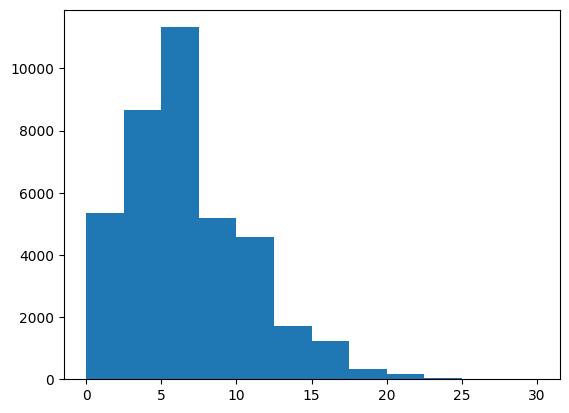

In [694]:
#Uni-Variate Analysis of Monthly_Installment_IncomeRatio which can help in getting normal trend of Loan Taking Ratio
plt.hist(loanData.Monthly_Installment_IncomeRatio,bins= [0,2.5,5,7.5,10,12.5,15, 17.5,20,22.5,25,27.5,30])
plt.show()

#Inference : Most of the People are having Income to installment to income Ratio as 2.5 - 12.5.

Uni-Variate Analysis of Grade which can help in getting distribution ration

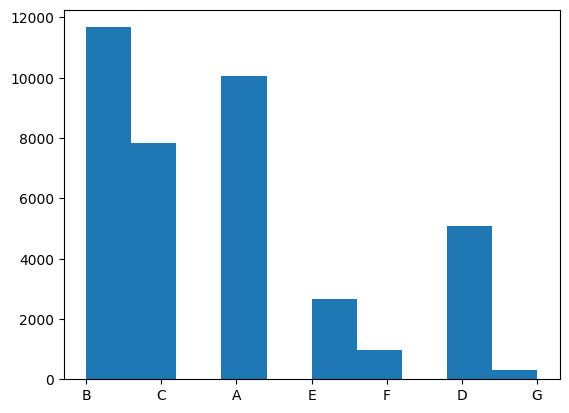

In [695]:
#univariate analysis on Grade
plt.hist(loanData["grade"])
plt.show()

#Inference : Most of the Loans are granted to people who belongs to A, B and C Grade.

Uni-Variate Analysis of Verification Status which can help in getting distribution ratio

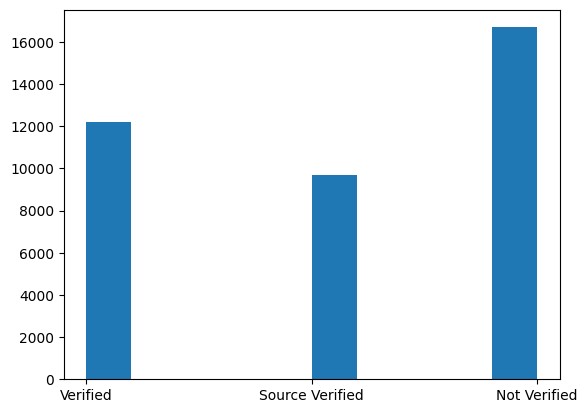

In [696]:
plt.hist(loanData["verification_status"])
plt.show()

#Inference : Most of the Loans are granted without verifying their Source of Income.

In [697]:
#UniVariate Analysis on annual_income
loanData["annual_inc"].describe()


#Here max value is very high, approx 101 times mean value, So we shall be removing outliers, till 99 percentile the value comes to be 234143.99999999878, So we shall remove the values greater than this value.
quantile = loanData["annual_inc"].quantile(0.99)
loanData = loanData[loanData["annual_inc"] <= quantile]

# now the minimum value of annual_inc is 4000 which is 10 times smaller than 25% and 14 times than 50% 
loanData["annual_inc"].describe()
quantile = loanData["annual_inc"].quantile(0.01)
loanData = loanData[loanData["annual_inc"] >= quantile]

#Inference: Most of the people earn between 14K to 78 K

Uni-Variate Analysis of EMP_Length which can help in getting loan given based on employment length

(array([  953., 11700.,  7246.,  5300.,  3109.,  9558.]),
 array([-1,  0,  3,  5,  7,  9, 10]),
 <BarContainer object of 6 artists>)

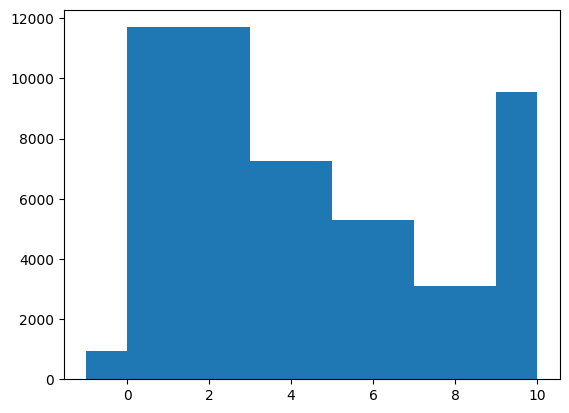

In [698]:
plt.hist(loanData['emp_length'],bins= [-1,0,3,5,7,9,10])

#Inference: Most of the people apply for loan when their experience is bettwen 0-3 and then from 9 years onwards. 
#So in first case, since they start earning, they may be needing money to settle down in a different city while doing Job
#In 2nd case after 9 years, it may be people start thinking of buying houses or may be because of kids they got some extra expenditure.

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

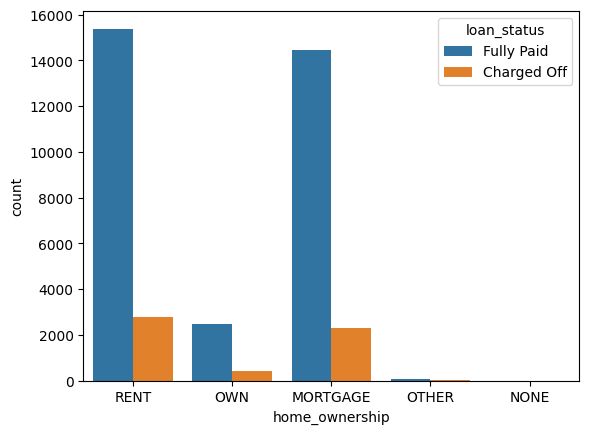

In [699]:
#home_ownership,term , sub_grade  ,  ,issue_d ,addr_state  
sns.countplot(data = loanData, x="home_ownership", hue="loan_status")
#Inference:  People having Own house have lesser loan requirements, while people having Rented House or on Mortgage has more loan requirements

<AxesSubplot:xlabel='term', ylabel='count'>

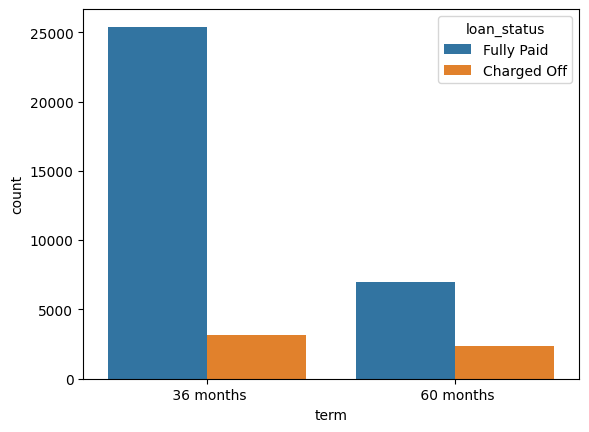

In [700]:
sns.countplot(data = loanData, x="term", hue="loan_status")
#Inference: Chances of people defualting loan is higher when the term is more, here 60 months

<AxesSubplot:xlabel='issue_year'>

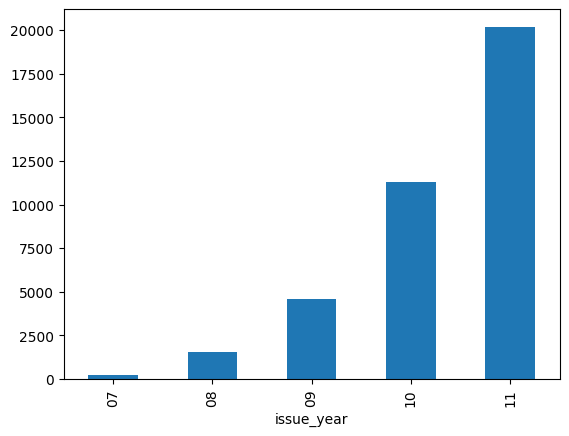

In [702]:
loanData.groupby(['issue_year'])['purpose'].count().plot.bar()

#Inference: Loan disbursement is increasing year by year

Uni-Variate Analysis of Purpose of loab which can help in getting why loans are taken normally

In [703]:
loanData["purpose"].value_counts()

#Inference:  Most if the People took loan to clear the debts. and then Credit card and for other purpose.
#On other hand there are very less people who took loan for renewable_energy,house ,educational                   

debt_consolidation    17811
credit_card            4967
other                  3767
home_improvement       2791
major_purchase         2105
small_business         1707
car                    1465
wedding                 915
medical                 667
moving                  557
vacation                366
house                   357
educational             293
renewable_energy         98
Name: purpose, dtype: int64

Bi-Variate Analysis

Bi-Variate Analysis on basis of Employment_Length and Loan Status

<AxesSubplot:xlabel='verification_status', ylabel='emp_length'>

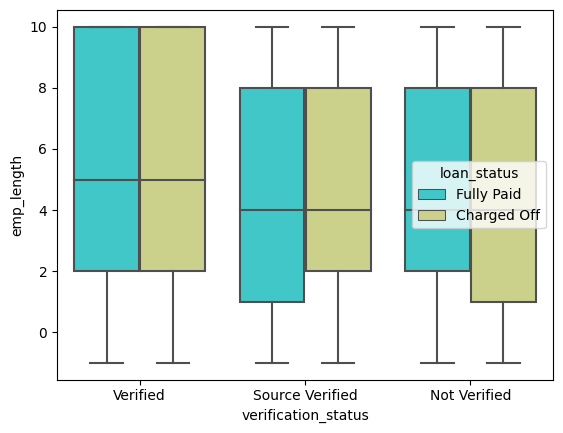

In [704]:

sns.boxplot(y='emp_length',x='verification_status',data=loanData,palette='rainbow', hue="loan_status")
#Inference: Incase of Verified Loans from Either source, whether its LC or Source, chances of defulting does not change
# But it changes when source of income is not verified and Employment length is lesser

Bi-Variate Analysis on basis of Verification Status and Loan Status

<AxesSubplot:xlabel='purpose', ylabel='Monthly_Installment_IncomeRatio'>

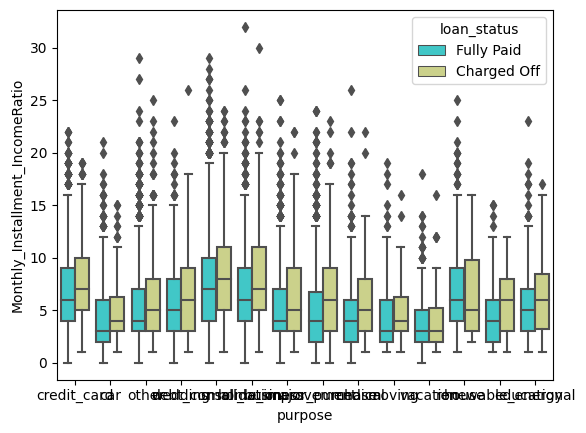

In [705]:
sns.boxplot(y='Monthly_Installment_IncomeRatio',x='purpose',data=loanData,palette='rainbow', hue="loan_status")
#Inference:Depending on purpose of loan, the chances of loan being Charged Off or Bad loan increases

<AxesSubplot:xlabel='verification_status', ylabel='Monthly_Installment_IncomeRatio'>

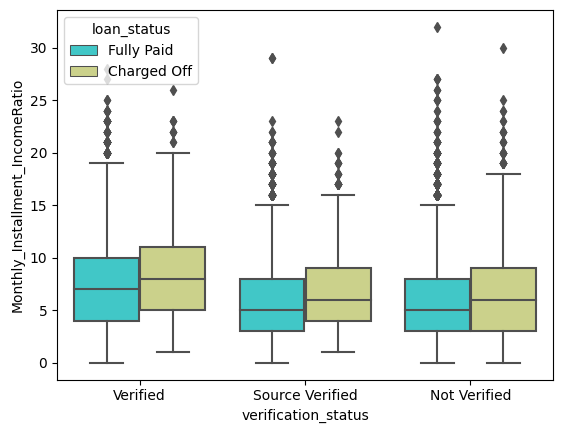

In [706]:
sns.boxplot(y='Monthly_Installment_IncomeRatio',x='verification_status',data=loanData,palette='rainbow',hue="loan_status")
#Inference:Depending on Source of Income Verification Status, the chances of loan being Charged Off or getting converted to Bad loan increases

<AxesSubplot:xlabel='grade', ylabel='Monthly_Installment_IncomeRatio'>

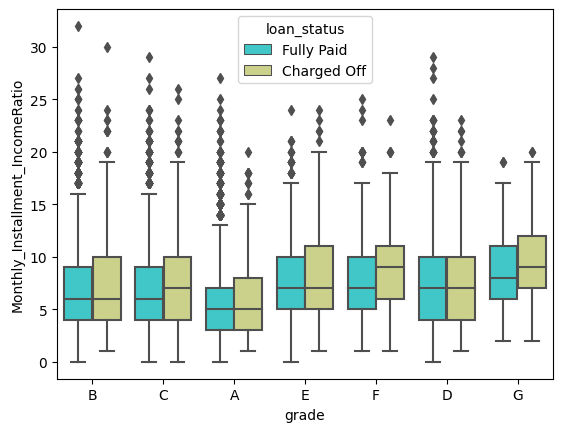

In [707]:
sns.boxplot(y='Monthly_Installment_IncomeRatio',x='grade',data=loanData,palette='rainbow',hue="loan_status")
#Inference:Depending on Grade the loan getting converted to bad loan increas on higher side of Monthly_Installment_IncomeRatio %

<AxesSubplot:xlabel='home_ownership', ylabel='Monthly_Installment_IncomeRatio'>

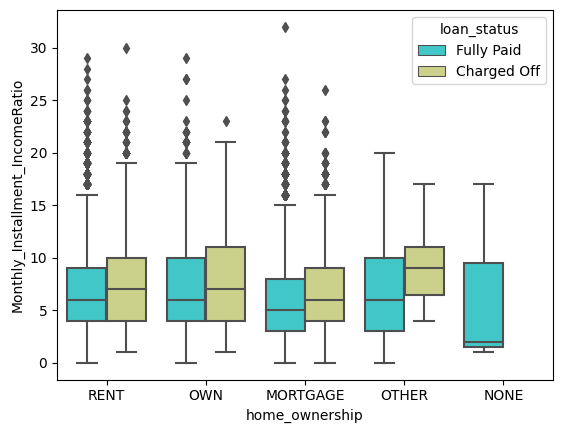

In [708]:
sns.boxplot(y='Monthly_Installment_IncomeRatio',x='home_ownership',data=loanData,palette='rainbow',hue="loan_status")
#Inference:Depending on home_ownership the loan getting converted to bad loan increas on higher side of Monthly_Installment_IncomeRatio %

<AxesSubplot:xlabel='emp_length', ylabel='Monthly_Installment_IncomeRatio'>

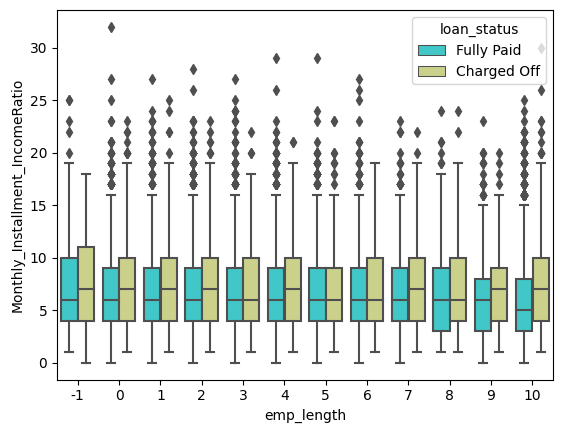

In [709]:
sns.boxplot(y='Monthly_Installment_IncomeRatio',x='emp_length',data=loanData,palette='rainbow',hue="loan_status")
#Inference:Depending on emp_length the loan getting converted to bad loan increas on higher side of Monthly_Installment_IncomeRatio %

Multi-Variate Analysis

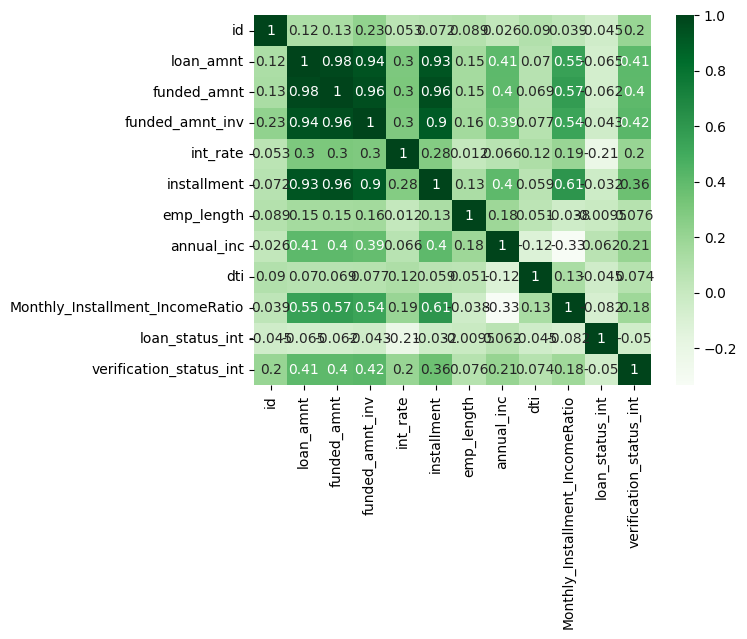

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,Monthly_Installment_IncomeRatio,loan_status_int,verification_status_int
id,1.00,0.12,0.13,0.23,0.05,0.07,0.09,0.03,0.09,0.04,-0.04,0.20
loan_amnt,0.12,1.00,0.98,0.94,0.30,0.93,0.15,0.41,0.07,0.55,-0.06,0.41
funded_amnt,0.13,0.98,1.00,0.96,0.30,0.96,0.15,0.40,0.07,0.57,-0.06,0.40
funded_amnt_inv,0.23,0.94,0.96,1.00,0.30,0.90,0.16,0.39,0.08,0.54,-0.04,0.42
int_rate,0.05,0.30,0.30,0.30,1.00,0.28,0.01,0.07,0.12,0.19,-0.21,0.20
installment,0.07,0.93,0.96,0.90,0.28,1.00,0.13,0.40,0.06,0.61,-0.03,0.36
emp_length,0.09,0.15,0.15,0.16,0.01,0.13,1.00,0.18,0.05,-0.04,-0.01,0.08
annual_inc,0.03,0.41,0.40,0.39,0.07,0.40,0.18,1.00,-0.12,-0.33,0.06,0.21
dti,0.09,0.07,0.07,0.08,0.12,0.06,0.05,-0.12,1.00,0.13,-0.04,0.07
Monthly_Installment_IncomeRatio,0.04,0.55,0.57,0.54,0.19,0.61,-0.04,-0.33,0.13,1.00,-0.08,0.18


In [716]:
sns.heatmap(loanData.corr(),cmap="Greens", annot=True)
plt.show()
loanData.corr()
#Inference: loan_amount, funded_amount, funded_amount_inv is highly correrlated
#funded_amount has negative correlation with loan Status
#intrest Rate is also having  negative correlation with loan Status
#Monthly_Installment_IncomeRatio is also having  negative correlation with loan Status

# Inference:

Inference:
Following attrubutes looks to be important: funded_amount, verification_status, employment_length, grade   

More Monthly_Installment_IncomeRatio, means chances of being Charged Off increases  
Employment length  has inverse relation with loan status.. so lesser the employment length, higher is the chances of getting converted to a bad loan.  
If the grade given to borrower is A, B, C then chances of loan being charged off decreases.  
Loans with Source of income verified has lesser chances of being charged off 
